결정트리: 정보이득지수 기준으로 나눔  
정보이득지수 = 1-엔트로피지수  
-> 혼잡할수록 낮다  
  
  
엔트로피: 정보의 불확실성 = 혼잡성  
-> 서로 값이 다를수록 높음  
  
  
지니 계수 기준으로 브랜치 계속 나눔   
-> 지니계수 높으면 불평등-> 혼잡하다  
  
----------  
지니계수 높다(max 1) = 불평등하다 = 엔트로피 높다 = 불확실성 높다 = 혼잡성 높다 = 정보이득지수 낮다(min 0)

----------  
  
결정트리의 하이퍼파라미터  
오버피팅이 일어남?  
크기의 트리 제어

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')     # 경고메세지(주의사항 =/= 에러) 안뜨게 하기

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
# 훈련시킨 모델 시각화
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)
# 여기까지 하면 동일 폴더에 tree.dot 생김

In [3]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

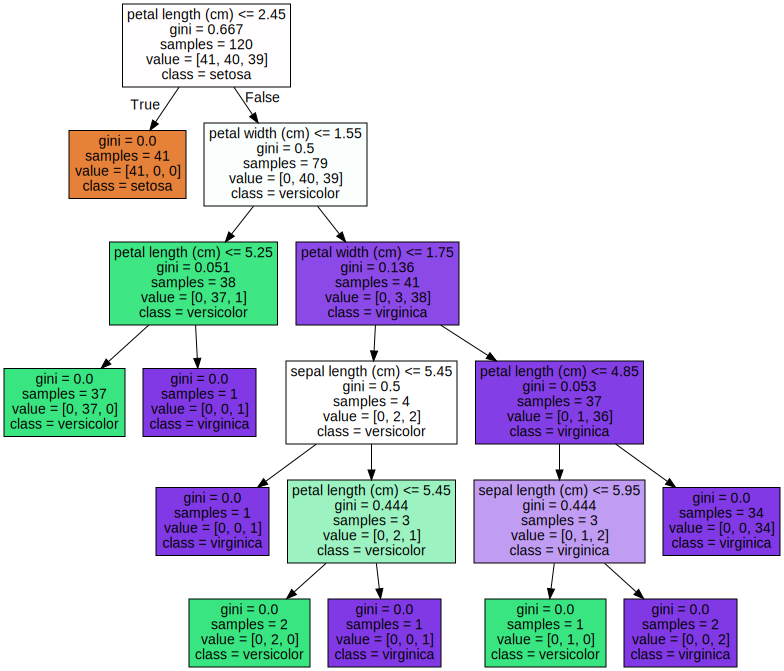

In [4]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

# 지니계수 0 = 혼잡도 0 = 분류 완료

#### 하이퍼 파라메터 : max_depth

In [5]:
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)     # 요기 하이퍼 파라미터
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, \
                        iris_data.target, test_size=0.2,  random_state=11)
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

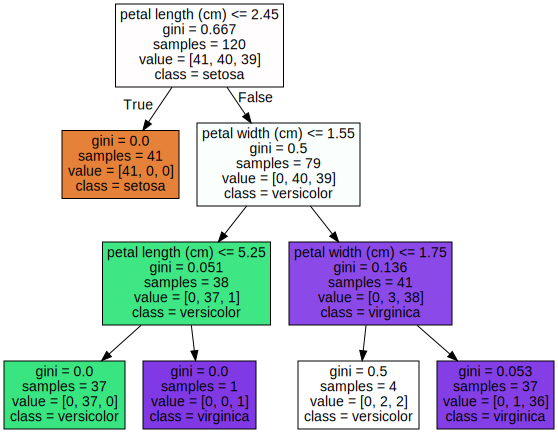

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names= iris_data.feature_names,\
    impurity=True,filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#### 하이퍼파라메터 : min_samples_split

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
dt_clf = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, \
                        iris_data.target, test_size=0.2,  random_state=11)
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

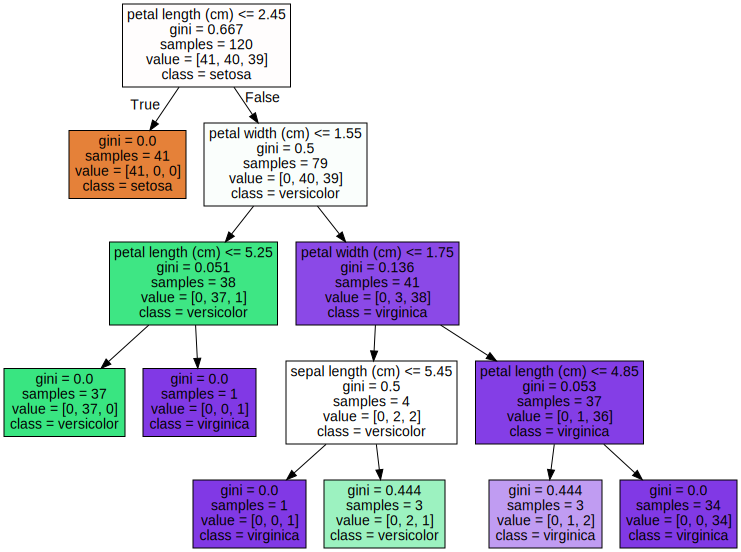

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names= iris_data.feature_names,\
    impurity=True,filled=True) # impurity 진위 계수 True False , filled 색입히기 True False

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#### 하이퍼파라메터 : min_samples_leaf(각 클래스가 하나라고 min_samples_leaf이상인 값이 있는 경우 분할)

In [9]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 3, random_state=156)
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, \
                        iris_data.target, test_size=0.2,  random_state=11)
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=156)

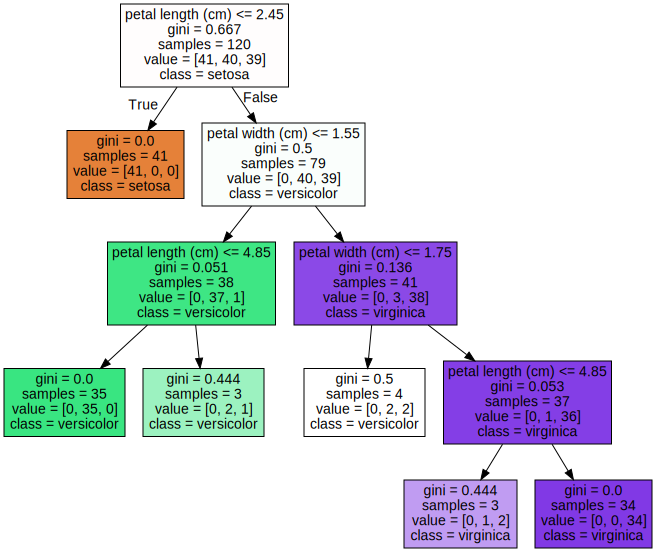

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names= iris_data.feature_names,\
    impurity=True,filled=True) # impurity 진위 계수 True False , filled 색입히기 True False

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

Feature importances
[0.    0.    0.554 0.446]
sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.554
petal width (cm): 0.446


<Axes: >

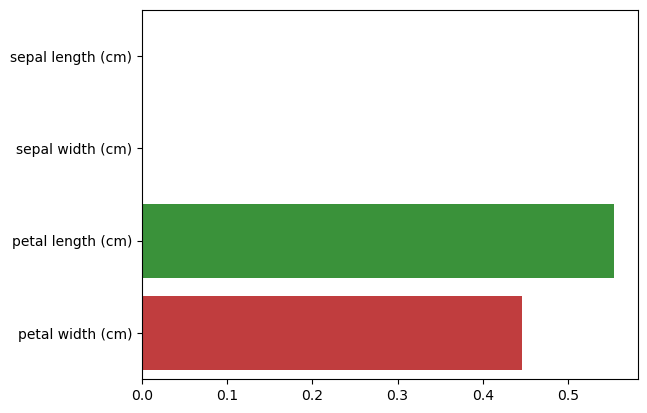

In [11]:
import seaborn as sns
import numpy as np


print("Feature importances\n{0}".format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name,value))

sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

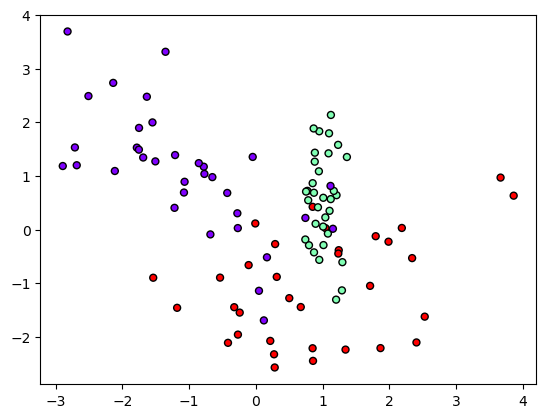

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_redundant : 독립 변수들 중 선형 조합으로 나타낼 수 있는 성분의 수, 디폴트 : 2
# n_informative : 독립변수들 중 종속 변수하고 상관관계가 있는 성분의 수, 디폴트 : 2

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,\
    n_classes=3,n_clusters_per_class=1,random_state=0)

plt.scatter(X_features[:, 0],X_features[:, 1],marker='o', \
    c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [16]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
            clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='rainbow', clim=(y.min(), y.max()),
                        zorder=1)









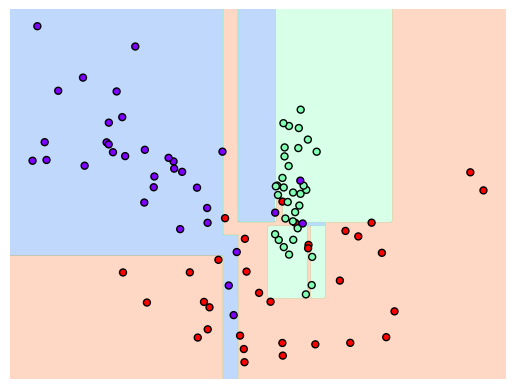

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

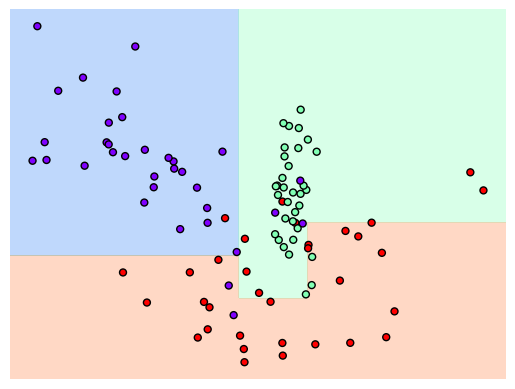

In [18]:
# min_sample_leaf = 6
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)